In [203]:
import matplotlib.pyplot as plt
import pandas as pd

In [204]:
appleOldData = pd.read_csv("../Data/HistoricalStocks/AAPL_1980-2021.csv", usecols=['date', 'open', 'high', 'low', 'close', 'volume'])

In [206]:
appleOldData['date'] = pd.to_datetime(appleOldData['date'])
# Calculate the 12-period EMA
appleOldData['EMA12'] = appleOldData['close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA
appleOldData['EMA26'] = appleOldData['close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
appleOldData['MACD'] = appleOldData['EMA12'] - appleOldData['EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
appleOldData['Signal_Line'] = appleOldData['MACD'].ewm(span=9, adjust=False).mean()

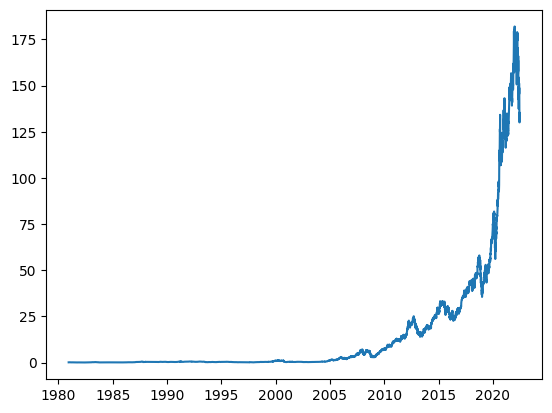

In [207]:
plt.plot(appleOldData['date'], appleOldData['close'])

In [208]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import numpy as np

## The data has large exponential growth, here are possible remedies
Run the below cells and it will visualise each selected method results, this helps understand how different techniques affect the data
Scale the data to log:
```
#log scale volume
appleOldData['close'] = np.log1p(appleOldData['close'])
appleOldData['volume'] = np.log1p(appleOldData['volume'])
appleOldData.tail()
```

In [209]:
# Convert values to percentage changes
appleOldData['close'] = appleOldData['close'].pct_change()
appleOldData['volume'] = appleOldData['volume'].pct_change()

In [210]:
#raw data preprocessing step
appleOldData = appleOldData.select_dtypes(include=['float64', 'int64'])
appleOldData = appleOldData.fillna(0)
appleOldData = appleOldData.astype('float64')
# Remove rows with NaN or infinite values
appleOldData = appleOldData[np.isfinite(appleOldData.iloc[:, 4])]

In [211]:
appleOldData.tail()

,open,high,low,close,volume,EMA12,EMA26,MACD,Signal_Line
10463,132.869995,135.199997,131.440002,-0.038285,0.336504,142.967603,146.747284,-3.779681,-3.288622
10464,133.130005,133.889999,131.479996,0.006673,-0.306224,141.397202,145.711188,-4.313987,-3.493695
10465,134.289993,137.339996,132.160004,0.020111,0.079598,140.479169,144.949618,-4.470449,-3.689046
10466,132.080002,132.389999,129.039993,-0.039651,0.181256,138.876220,143.846683,-4.970463,-3.945329
10467,130.070007,133.080002,129.809998,0.011533,0.240415,137.750647,142.936559,-5.185911,-4.193446


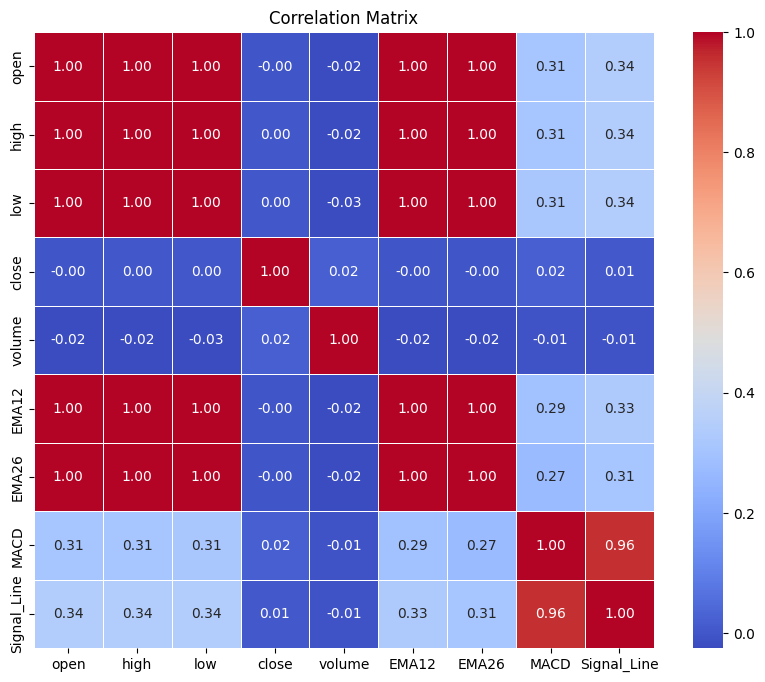

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = appleOldData.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

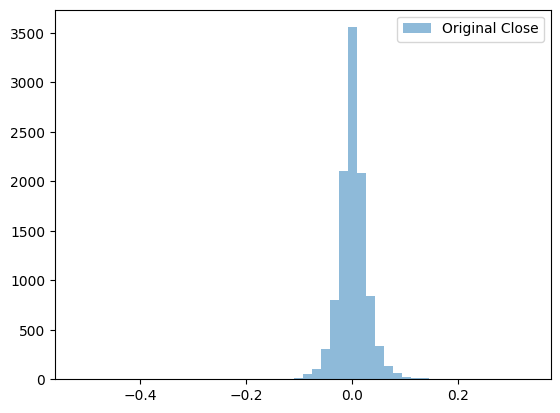

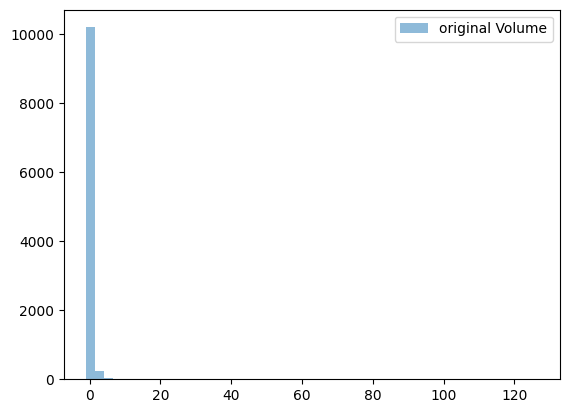

In [187]:
plt.hist(appleOldData.iloc[:, 3], bins=50, alpha=0.5, label="Original Close")
plt.legend()
plt.show()

plt.hist(appleOldData.iloc[:, 4], bins=50, alpha=0.5, label="original Volume")
plt.legend()
plt.show()

In [188]:
scaler = RobustScaler().fit(appleOldData)
appleScaled = scaler.transform(appleOldData)

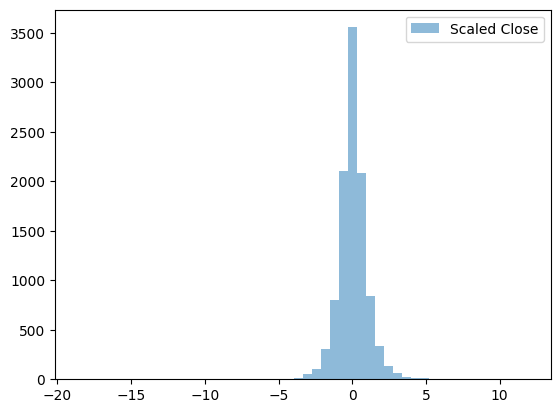

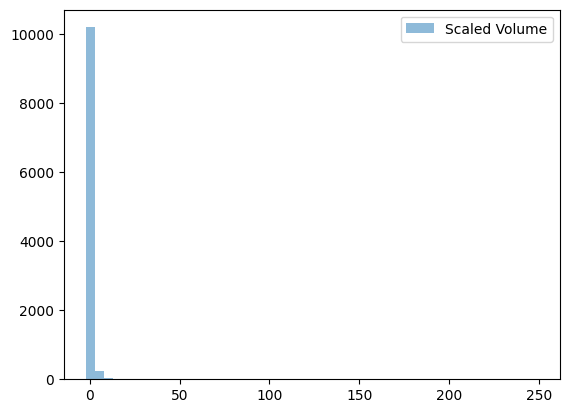

In [189]:
plt.hist(appleScaled[:, 3], bins=50, alpha=0.5, label="Scaled Close")
plt.legend()
plt.show()

plt.hist(appleScaled[:, 4], bins=50, alpha=0.5, label="Scaled Volume")
plt.legend()
plt.show()

In [190]:
appleScaled.mean(axis=0)

array([0.97330706, 0.97776662, 0.97963776, 0.03862534, 0.30120996])

In [191]:
appleScaled.std(axis=0)

array([2.17440462, 2.18640003, 2.18703205, 1.01930002, 2.97110482])

In [192]:
appleScaled

array([[-0.02355779, -0.02399155, -0.02344652,  0.        ,  0.04468328],
       [-0.023976  , -0.02444496, -0.02391078, -1.87575948, -1.1846404 ],
       [-0.02458436, -0.02504957, -0.02452986, -2.63896956, -0.73987199],
       ...,
       [ 9.11735356,  9.2670946 ,  9.13077459,  0.7230936 ,  0.20124543],
       [ 8.96677899,  8.93191142,  8.9144532 , -1.42563988,  0.40119543],
       [ 8.82983086,  8.97863416,  8.96784037,  0.4146659 ,  0.51755519]])

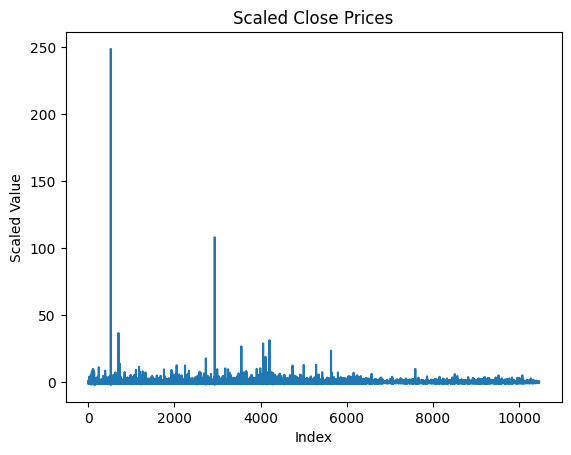

In [195]:
# Assuming the second column (index 1) corresponds to 'close'
plt.plot(appleScaled[:, 4])  # Replace 1 with the correct index for 'close'
plt.title('Scaled Close Prices')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.show()